In [1]:
import pandas as pd 
import numpy as np
import sklearn
import seaborn as sb
import matplotlib.pyplot as plt

In [28]:
df = pd.read_csv("Boston.csv")
df

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,502,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,503,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,504,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,505,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [29]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)
df

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [30]:
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [31]:
df.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
black      0
lstat      0
medv       0
dtype: int64

In [32]:
corr_matrix = df.corr()
corr_matrix['medv'].sort_values(ascending=False)

medv       1.000000
rm         0.695360
zn         0.360445
black      0.333461
dis        0.249929
chas       0.175260
age       -0.376955
rad       -0.381626
crim      -0.388305
nox       -0.427321
tax       -0.468536
indus     -0.483725
ptratio   -0.507787
lstat     -0.737663
Name: medv, dtype: float64

<AxesSubplot: >

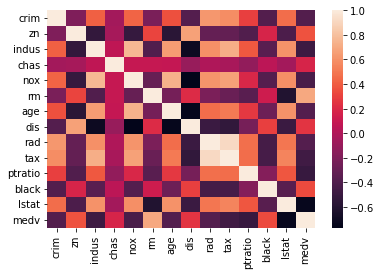

In [33]:
sb.heatmap(df.corr(),annot=False)

array([[<AxesSubplot: xlabel='medv', ylabel='medv'>,
        <AxesSubplot: xlabel='lstat', ylabel='medv'>,
        <AxesSubplot: xlabel='zn', ylabel='medv'>,
        <AxesSubplot: xlabel='rm', ylabel='medv'>],
       [<AxesSubplot: xlabel='medv', ylabel='lstat'>,
        <AxesSubplot: xlabel='lstat', ylabel='lstat'>,
        <AxesSubplot: xlabel='zn', ylabel='lstat'>,
        <AxesSubplot: xlabel='rm', ylabel='lstat'>],
       [<AxesSubplot: xlabel='medv', ylabel='zn'>,
        <AxesSubplot: xlabel='lstat', ylabel='zn'>,
        <AxesSubplot: xlabel='zn', ylabel='zn'>,
        <AxesSubplot: xlabel='rm', ylabel='zn'>],
       [<AxesSubplot: xlabel='medv', ylabel='rm'>,
        <AxesSubplot: xlabel='lstat', ylabel='rm'>,
        <AxesSubplot: xlabel='zn', ylabel='rm'>,
        <AxesSubplot: xlabel='rm', ylabel='rm'>]], dtype=object)

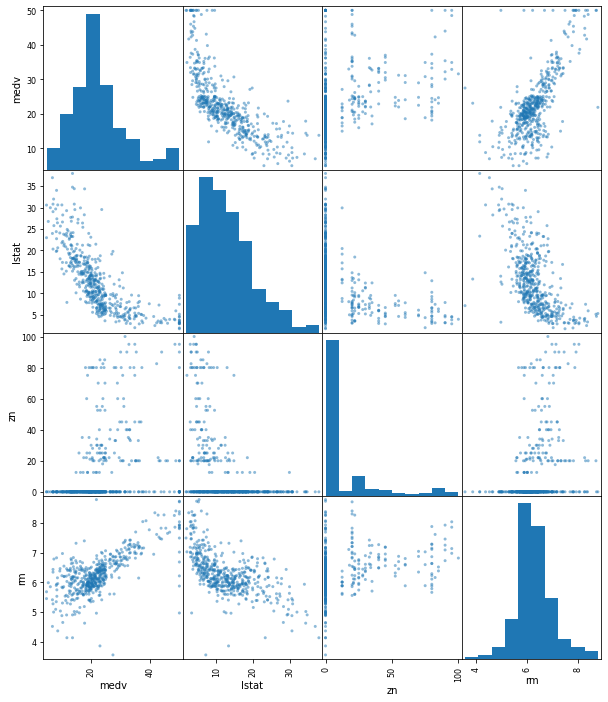

In [34]:
from pandas.plotting import scatter_matrix

attributes = ['medv' , 'lstat', 'zn', 'rm']

scatter_matrix(df[attributes],figsize=(10,12))

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

x_train, x_test, y_train, y_test = train_test_split(df.drop(['medv'],axis=1),df['medv'],test_size=0.2,random_state=0)

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [36]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential(layers=[
    Dense(64,input_shape=(x_train_scaled.shape[1],),activation="relu"),
    Dense(32,activation="relu"),
    Dense(16,activation="relu"),
    Dense(1,activation="linear")
    
])

model.compile(optimizer="adam", loss="mse", metrics=['mae'])
model.summary()

D:\Anaconda\envs\pytorch\lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                │ (None, 64)             │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,521 (13.75 KB)

 Trainable params: 3,521 (13.75 KB)

 Non-trainable params: 0 (0.00 B)

In [37]:
history = model.fit(x_train_scaled,y_train,validation_split=0.2,epochs=100,verbose=True)

Epoch 1/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 627.4489 - mae: 23.2078 - val_loss: 580.9149 - val_mae: 22.1302
Epoch 2/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 575.4951 - mae: 22.4359 - val_loss: 554.7977 - val_mae: 21.5861
Epoch 3/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 546.4468 - mae: 21.5991 - val_loss: 522.1906 - val_mae: 20.8879
Epoch 4/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 528.1133 - mae: 20.9906 - val_loss: 472.1104 - val_mae: 19.7512
Epoch 5/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 450.0541 - mae: 19.4967 - val_loss: 391.7515 - val_mae: 17.7835
Epoch 6/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 381.2646 - mae: 17.5593 - val_loss: 280.1158 - val_mae: 14.6786
Epoch 7/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 279.9128 - mae: 14.3559 - val_loss: 153.1520 - val_mae: 10.2808
Epoch 8/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 147.6038 - mae: 10.0087 - val_loss: 75.2128 - val_mae: 6.3973
Epoch 9/100
11/11

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 8.3787 - mae: 2.1045 - val_loss: 10.4211 - val_mae: 2.2716
Epoch 55/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 7.8577 - mae: 2.0164 - val_loss: 10.2126 - val_mae: 2.2482
Epoch 56/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 8.7352 - mae: 2.0772 - val_loss: 10.1963 - val_mae: 2.2874
Epoch 57/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 7.1700 - mae: 1.9559 - val_loss: 9.8523 - val_mae: 2.2137
Epoch 58/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 9.1941 - mae: 2.1802 - val_loss: 9.9004 - val_mae: 2.2308
Epoch 59/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 9.0305 - mae: 2.1887 - val_loss: 9.5973 - val_mae: 2.2125
Epoch 60/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 7.3477 - mae: 1.9889 - val_loss: 9.6172 - val_mae: 2.2230
Epoch 61/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 9.3159 - mae: 2.0662 - val_loss: 9.1830 - val_mae: 2.1343
Epoch 62/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 8.0401

In [27]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


preds = model.predict(x_test_scaled)
mse = r2_score(y_test,preds)

print(mse)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
0.7021141206221548
